# Tarea 02

Fecha *límite* de entrega: **miércoles 26 de agosto, antes de las 15:00 horas**

**No** se recibirán tareas después del inicio de la clase del miércoles 26 de agosto.

Manda un solo notebook de Jupyter / IPython con tus respuestas a las preguntas a `bvillasen@gmail.com`, siguiendo las instrucciones en `formato_tareas.md`.


Explica brevemente qué estás haciendo. Redacta oraciones completas en español con acentos. Usa ecuaciones en LaTeX cuando sea necesario.

El notebook debe ser ejecutable, es decir, cada celda debe correr sin errores, y debe reproducir la salida que aparece en la pantalla.

## Preguntas

(1) Implementa una función `mi_sin` usando recursión.
Puedes utilizar el operador `%`, que calcula el resto de una divisíon (ver abajo).  Calcula $\sin(1)$. 

Primero, la serie de Taylor de $\sin(x)$ está dada por
$$\sin(x) = \sum^\infty_{n=0} \frac{(-1)^n}{(2n+1)!} x^{2n+1}$$

Siguiendo el mismo método que en la tarea 01, si definimos 
$$s_n = \frac{(-1)^n}{(2n+1)!} x^{2n+1} + s_{n-1}$$ 
con $s_0 = x$, entonces 

$$\sum^k_{n=0} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = s_k$$

En código:

In [68]:
## Definimos una función que acepta x y el número de términos en la expansión
function mi_sin(x, n::Int=7)
    if n > 0
        return (-1)^n/factorial(2n+1)*x^(2n+1) + mi_sin(x, n-1)
    elseif n == 0
        return x
    end
end

## El resultado es correcto
println(mi_sin(1))

0.8414709848078937


(2) Implementa una nueva versión de la función exponencial que calcule el exponencial de su argumento $x$. Para hacerlo, no utilices recursión, sino primero construye un arreglo adecuado y de ahí calcula el exponencial.

La exponencial está dada por la siguiente serie de Taylor:
$$\exp(x) = \sum^\infty_{n=0} \frac{x^n}{n!}$$
y puede ser aproximada por una cantidad finita de primeros términos. Entonces usamos la definición casi directamente:

In [69]:
## Hacemos la suma de los primeros n términos de la serie de Taylor correspondiente
mi_exp(x, n=10) = sum([x^k/factorial(k) for k in 0:n]);

## Prueba rápida. Tiene que dar ≈2.718
println(mi_exp(1))

2.7182818011463845


(3) Implementa una función `mi_sin2` que utiliza un arreglo. Calcula $\sin(1)$. 

Al igual que en el ejercicio 1, usamos la expansión de Taylor truncada, pero la calculación se hace de forma análoga al ejercicio 2

In [70]:
## Suma de los primeros n términos de la serie de Taylor para sin(x)
mi_sin2(x, n=7) = sum([(-1)^k/factorial(2k+1)*x^(2k+1) for k in 0:n])

# Pruebas rápidas
println(mi_sin2(0)) # Tiene que dar 0
println(mi_sin2(1)) # Tiene que dar ≈0.84
println(mi_sin2(π/2)) # Tiene que dar 1

0.0
0.8414709848078937
0.9999999999939768


4. Implementa una función `mi_sin3` que utiliza la fórmula de Euler. Calcula $\sin(1)$. 

La fórmula de Euler es
$$e^{i\theta} = \cos(\theta) + i \sin(\theta)$$

Entonces, es fácil ver que se cumple
$$\sin(\theta) = \frac{1}{2i} \cdot \left( e^{i\theta} - e^{-i\theta}\right)$$

En código, esto es muy fácil de implementar:

In [71]:
## Vamos a usar la exponente de Julia. No sacaremos parte real porque se necesitará todo el número
## para el próximo ejercicio
mi_sin3(θ) = -0.5*im*(exp(im*θ)-exp(-im*θ));

## Una prueba rápida
println(mi_sin3(1))

0.8414709848078965 - 0.0im


(5) ¿Funcionan estas funciones con argumentos que sean números complejos?

Al definir estas funciones no requerimos en ningún punto que sus argumentos sean reales. Como la aritmética en Julia (en particular las potencias $x^n$) funciona perfectamente bien tanto para complejos como para reales, no hay ningún problema con dar argumentos complejos a las funciones que definimos. Entonces, por instancia, se tiene que tener:

$$e^{i\pi} = -1$$
$$\sin(-i) = -i \frac{e-e^{-1}}{2} \approx -1.175i$$

In [72]:
println(mi_exp(im*π, 15)) ## Correcto
println(mi_sin(-im)) ## Correcto
println(mi_sin2(-im)) ## Correcto
println(mi_sin3(-im)) ## Correcto

-1.0000041678091423 - 7.727858895023587e-7im
0.0 - 1.1752011936437987im
0.0 - 1.1752011936437987im
0.0 - 1.1752011936438014im


(6) ¿Cómo podrías implementar `mi_cos` sin mayor dificultad? Hazlo.

Una manera simple de obtener $\cos(x)$ a partir de $\sin(x)$ es usar la identidad
$$\cos(x) = \sin \left(x + \frac{\pi}{2} \right)$$

Entonces defino 3 funciones coseno a partir de las 3 funciones seno:

In [73]:
mi_cos(x, n=7) = mi_sin(x+π/2, n);
mi_cos2(x, n=7) = mi_sin2(x+π/2, n);
mi_cos3(x) = mi_sin3(x+π/2);

(7) Verifica unas relaciones trigonométricas con tus funciones.

Unas identidades conocidas son:
$$\sin(x)^2 + \cos(x)^2 = 1$$
$$\cos(x)^2 = \frac{1+\cos(2x)}{2}$$
$$\sin(2x) = 2 \sin(x) \cos(x)$$

In [74]:
using PyPlot;

## Primero creamos unas función auxiliar sencilla para verificar las identidades
## Esta función grafica la diferencia absoluta (idealmente 0) entre las partes derecha e izquierda de las identidades 
## para valores de x entre 0 y π.
## Note que acepta funciones arbitrarias s,c como argumentos

function aux(s, c)
    xr = π * [0:1/100:1]
    
    xlabel("Eje X")
    ylabel("Error absoluto");
    plot(xr, [abs(s(x)^2 + c(x)^2 - 1) for x in xr], label=L"$\sin(x)^2 + \cos(x)^2 = 1$");
    plot(xr, [abs( c(x)^2 - (1+c(2x))/2 ) for x in xr], label=L"$\cos(x)^2 = \frac{1+\cos(2x)}{2}$");
    plot(xr, [abs(s(2x) - 2*s(x)*c(x)) for x in xr], label=L"$\sin(2x) = 2 \sin(x) \cos(x)$");
    legend();
end;

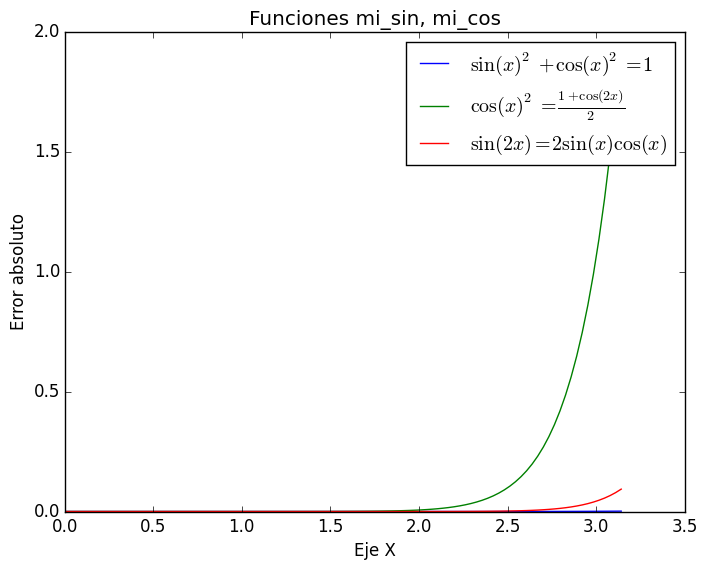

In [75]:
aux(mi_sin, mi_cos);
title("Funciones mi_sin, mi_cos");

**Discusión: como se ve en la gráfica anterior, el primer par de funciones (recursivas y con 7 términos) mantienen su precisión sobre un rango bastante grande de valores. Después de $\theta \approx 2$, sin embargo, el error empieza a crecer rápidamente. Esto no es sorprendente ya que una serie de Taylor truncada siempre es una aproximación y falla con valores lo suficientemente grandes**

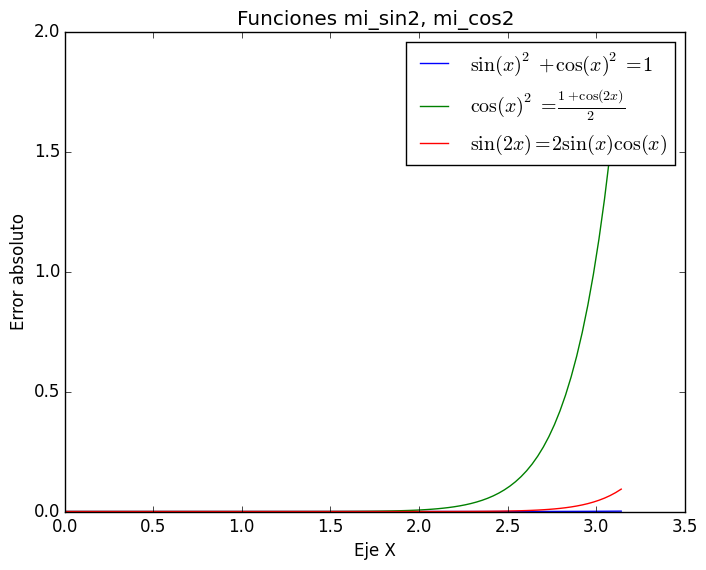

In [76]:
aux(mi_sin2, mi_cos2);
title("Funciones mi_sin2, mi_cos2");

**Discusión: para la segunda pareja de funciones obtenemos exactamente la misma imágen, lo cual no es sorprendente. Aunque definimos las funciones en términos de arreglos y no recursión, los términos sumados son exactamente los mismos (y es el mismo número de ellos)**

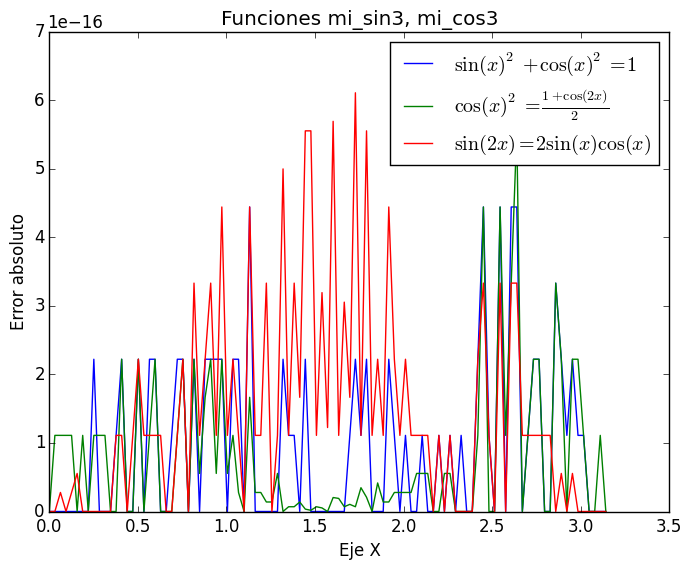

In [77]:
aux(mi_sin3, mi_cos3);
title("Funciones mi_sin3, mi_cos3");

**Discusión: en el caso de la tercer pareja de funciones definidas a través de la exponencial de Julia, es evidente la consistencia de las funciones integradas.**

Ejemplo del uso del operador `%`:

In [78]:
5 % 3

2